## import library  

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import matplotlib.pyplot as plt

## read data

In [2]:
path_data_istabul = 'data/Istanbul Weather Data normalization.csv'

df = pd.read_csv(path_data_istabul)
print(df.shape)
df.head(10)

(3896, 7)


,DateTime,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
0,2009-01-01,0.005476,0.200,0.225806,0.148148,0.877193,0.760870
1,2009-01-02,0.106667,0.175,0.193548,0.185185,0.859649,0.630435
2,2009-01-03,0.001905,0.200,0.258065,0.259259,0.947368,0.630435
3,2009-01-04,0.069286,0.200,0.258065,0.129630,0.947368,0.478261
4,2009-01-05,0.102857,0.200,0.258065,0.240741,1.000000,0.500000
5,2009-01-06,0.064524,0.200,0.258065,0.370370,0.982456,0.478261
6,2009-01-07,0.005476,0.250,0.225806,0.166667,0.842105,0.652174
7,2009-01-08,0.072857,0.275,0.193548,0.185185,0.842105,0.695652
8,2009-01-09,0.030000,0.150,0.161290,0.388889,0.754386,0.891304
9,2009-01-10,0.000000,0.200,0.161290,0.092593,0.736842,0.782609


In [3]:
def re_organize(df):
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df.set_index("DateTime",inplace=True)
    return df
df= re_organize(df)
df

,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
DateTime,,,,,,
2009-01-01,0.005476,0.200,0.225806,0.148148,0.877193,0.760870
2009-01-02,0.106667,0.175,0.193548,0.185185,0.859649,0.630435
2009-01-03,0.001905,0.200,0.258065,0.259259,0.947368,0.630435
2009-01-04,0.069286,0.200,0.258065,0.129630,0.947368,0.478261
2009-01-05,0.102857,0.200,0.258065,0.240741,1.000000,0.500000
...,...,...,...,...,...,...
2019-08-28,0.000000,0.750,0.903226,0.407407,0.368421,0.500000
2019-08-29,0.000000,0.750,0.870968,0.333333,0.421053,0.521739
2019-08-30,0.011905,0.725,0.870968,0.370370,0.403509,0.500000


In [4]:
def shift(data,name):
    data[str(name)+str("_shift")]=data[str(name)].shift(-1)
    data=data.dropna(how='any')
    return data

df = shift(df,"Rain")
df

,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure,Rain_shift
DateTime,,,,,,,
2009-01-01,0.005476,0.200,0.225806,0.148148,0.877193,0.760870,0.106667
2009-01-02,0.106667,0.175,0.193548,0.185185,0.859649,0.630435,0.001905
2009-01-03,0.001905,0.200,0.258065,0.259259,0.947368,0.630435,0.069286
2009-01-04,0.069286,0.200,0.258065,0.129630,0.947368,0.478261,0.102857
2009-01-05,0.102857,0.200,0.258065,0.240741,1.000000,0.500000,0.064524
...,...,...,...,...,...,...,...
2019-08-27,0.000000,0.775,0.935484,0.462963,0.315789,0.521739,0.000000
2019-08-28,0.000000,0.750,0.903226,0.407407,0.368421,0.500000,0.000000
2019-08-29,0.000000,0.750,0.870968,0.333333,0.421053,0.521739,0.011905


In [5]:
lookback = 120
cols_train = ['Rain','MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity', 'AvgPressure']
cols_target = ['Rain_shift']


df_train_transformed = df.reset_index(drop=True)


X_train = df.loc[:,cols_train]
y_train = df.loc[:,cols_target]
print("X_train sahpe",X_train.shape)
print("y_train sahpe",y_train.shape)

X_train sahpe (3895, 6)
y_train sahpe (3895, 1)


In [6]:
#データの分割
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [7]:
type(y_train)
# X_train.shape

pandas.core.frame.DataFrame

## optimum parameter explore of SARIM

In [8]:
import itertools
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
 

# 各パラメータの範囲を決める
p =  q = range(1, 3)
sp  = sq = range(1, 3)
 
# p, d, q　の組み合わせを列挙するリストを作成
pdq = [(x[0], 1, x[1]) for x in list(itertools.product(p,q))]

#d はプロセスの積分順序を示す整数でなければならず，一方，p と q は，AR と MA の順序を示す整数（これらの順序までのすべてのラグが含まれるように）
 
# P, D, Q　の組み合わせを列挙するリストを作成すると同時に、後ろに　s = 12　を決め打ちでつけている。
seasonal_pdq = [(x[0], 1, x[1], 12) for x in list(itertools.product(sp, sq))]

#[AR パラメーター， 差分 ，MA パラメーター， 周期性のモデルの季節成分]
warnings.filterwarnings("ignore") # warnings を表示させないようにする
 
 
best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
          mod = sm.tsa.SARIMAX(y_train,
                          order = param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=True,
                          enforce_invertibility=True)
          results = mod.fit()
             
          print('order{}, s_order{} - AIC: {}'.format(param, param_seasonal, results.aic))
 
          if results.aic < best_result[2]:
            best_result = [param, param_seasonal, results.aic]
        except:
            continue
             
print('\AICが最も良いモデル:', best_result)
# best_result[2]

order(1, 1, 1), s_order(1, 1, 1, 12) - AIC: -10763.603792922351
order(1, 1, 1), s_order(1, 1, 2, 12) - AIC: -10760.86285631782
order(1, 1, 1), s_order(2, 1, 1, 12) - AIC: -10762.051843512982
order(1, 1, 1), s_order(2, 1, 2, 12) - AIC: -10759.468911371147
order(1, 1, 2), s_order(1, 1, 1, 12) - AIC: -10763.337305577734
order(1, 1, 2), s_order(1, 1, 2, 12) - AIC: -10760.925951355599
order(1, 1, 2), s_order(2, 1, 1, 12) - AIC: -10758.960063432345
order(1, 1, 2), s_order(2, 1, 2, 12) - AIC: -10759.269894852998
order(2, 1, 1), s_order(1, 1, 1, 12) - AIC: -10763.335660074485
order(2, 1, 1), s_order(1, 1, 2, 12) - AIC: -10760.504972892071
order(2, 1, 1), s_order(2, 1, 1, 12) - AIC: -10759.515364783987
order(2, 1, 1), s_order(2, 1, 2, 12) - AIC: -10759.290537776313
order(2, 1, 2), s_order(1, 1, 1, 12) - AIC: -10760.158486939034
order(2, 1, 2), s_order(1, 1, 2, 12) - AIC: -10758.18625652061
order(2, 1, 2), s_order(2, 1, 1, 12) - AIC: -10758.23989690002
order(2, 1, 2), s_order(2, 1, 2, 12) - AIC:

In [9]:
mod = sm.tsa.SARIMAX(y_train,
              order = best_result[0],
              seasonal_order=best_result[1],
              enforce_stationarity=True,
              enforce_invertibility=True)
 
results = mod.fit()
print('order{}, s_order{} - AIC: {}'.format(param, param_seasonal, results.aic))
print(results.summary())

order(2, 1, 2), s_order(2, 1, 2, 12) - AIC: -10763.603792922351
                                     SARIMAX Results                                      
Dep. Variable:                         Rain_shift   No. Observations:                 3505
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                5386.802
Date:                            Sat, 19 Sep 2020   AIC                         -10763.604
Time:                                    17:34:26   BIC                         -10732.813
Sample:                                01-01-2009   HQIC                        -10752.614
                                     - 08-06-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2730      0.006     45.842      0

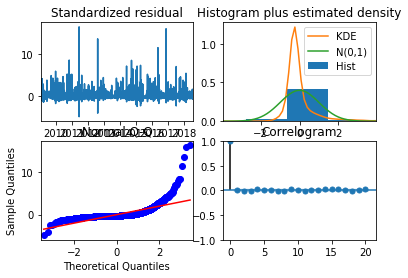

In [10]:
results.plot_diagnostics(lags=20);

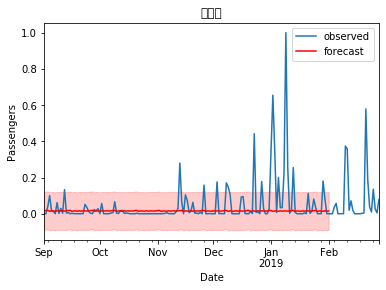

In [13]:
pred = results.get_prediction(start=pd.to_datetime("2018-09"),
                              end = pd.to_datetime("2019-02"),
                              )
 
# 期待予測と区間予測を取り出す
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int(alpha = .05)

# 折れ線の描画
df["2018-09":"2019-02"]["Rain_shift"].plot(label='observed')
pred_mean.plot(label='forecast', color = "r")
 
# 区間予測の描画
plt.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.2)

plt.title("東京の")
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend();

In [14]:
# y_forecasted = np.exp(pred.predicted_mean)
# y_truth = np.exp(Passengers_log['1958-01-01':])
 
# # RMSEの計算
# rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
# print('RMSE = {}'.format(round(rmse, 4)))

NameError: name 'Passengers_log' is not defined